Данные ноутбук использовался для генерации данных для отчета. 

In [40]:
from artm_experiments import Experiment, Pool, OptimizationTopicsFilter
from artm import *
import glob
import os
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


`%matplotlib` prevents importing * from pylab and numpy


In [62]:
batch_vectorizer = BatchVectorizer(data_path='kos', data_format='batches')

def create_model():
    model_artm = ARTM(num_topics=100,
                      scores=[PerplexityScore(name='PerplexityScore',
                                              use_unigram_document_model=False,
                                              dictionary_name='dictionary')],
                      regularizers=[SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.05),
                                    DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=0.5e+5)])

    if not os.path.exists('kos/dictionary.dict'):
        model_artm.gather_dictionary(dictionary_target_name='dictionary', 
                                     data_path='kos', vocab_file_path='vocab.kos.txt')
        model_artm.save_dictionary(dictionary_name='dictionary', dictionary_path='kos/dictionary.dict')
    else:
        model_artm.load_dictionary(dictionary_name='dictionary', dictionary_path='kos/dictionary.dict')
    model_artm.initialize(dictionary_name='dictionary', seed=np.random.randint(1000000))

    return model_artm

In [42]:
def display_points(phi):
    points = ConvexHullTopicsFilter.project_points(phi.as_matrix().T, dim=2)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(points[:, 0], points[:, 1], marker='o', ls='')
    for i in xrange(phi.shape[1]):
        ax.annotate(phi.columns[i], xy=points[i], textcoords='offset points')
        
    plt.show()
    
def save_hist(vals, bins, filename):
    bins = (bins[:-1] + bins[1:]) / 2.0
    np.savetxt(filename, np.vstack((bins, vals)).T, delimiter=',')

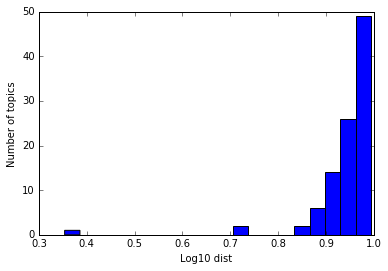

99


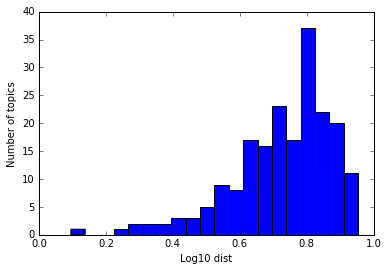

184


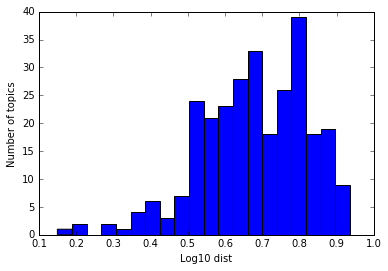

261


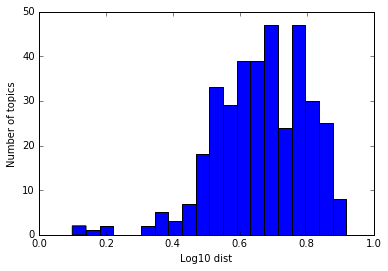

332


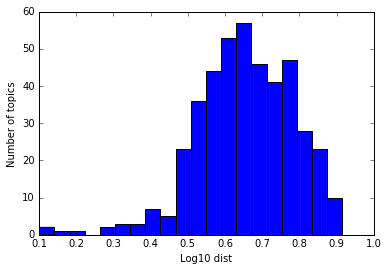

392


In [63]:
exp = Experiment(Pool(topics_filter=OptimizationTopicsFilter(eps=0.5, verbose=False), 
                      save_topics=True))
for i in xrange(5):
    model_artm = create_model()
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15, num_document_passes=1)
    #display_points(model_artm.get_phi())
    exp.collect_topics(model_artm.get_phi(), model_artm.get_theta())
    vals, bins = exp.topics_pool.topics_filter.plot_hist()
    save_hist(vals, bins, "data_iter_{}.csv".format(i))
    print exp.topics_pool.get_basic_topics_count()

In [64]:
from sklearn.metrics.pairwise import cosine_distances
for topic in exp.topics_pool.get_all_topics():
    print topic, cosine_distances(exp.topics_pool.topics_filter.projections[topic], exp.topics_pool.phi[topic])[0, 0]

topic0 0.592633403282
topic1 0.527533337436
topic2 0.756719135382
topic3 0.537000621857
topic4 0.467837869831
topic5 0.823099912108
topic6 0.477260216312
topic7 0.39874533936
topic8 0.54615362018
topic9 0.784916641459
topic10 0.612040280484
topic11 0.208079932145
topic12 0.0953532036766
topic13 0.458910255766
topic14 0.30837163915
topic15 0.353717415564
topic16 0.74343216097
topic17 0.864708005634
topic18 0.369505580111
topic19 0.365286353984
topic20 0.504634639514
topic21 0.439202177163
topic22 0.575689793271
topic23 0.836378950555
topic24 0.694695311075
topic25 0.802558621593
topic26 0.579738180728
topic27 0.423739788594
topic28 0.730130109138
topic29 0.722851749824
topic30 0.775169243698
topic31 0.690604940795
topic32 0.215905073445
topic33 0.347434512579
topic34 0.620780526978
topic35 0.63862773159
topic36 0.5121084175
topic37 0.716885154445
topic38 0.464731929541
topic39 0.584442923606
topic40 0.62023228739
topic41 

/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/

0.566512244532
topic42 0.529543082669
topic43 0.683872740583
topic44 0.375112846594
topic45 0.766953874309
topic46 0.586502234953
topic47 0.530361673774
topic48 0.480079824064
topic49 0.537846326667
topic50 0.697662274242
topic51 0.739142317415
topic52 0.661153506179
topic53 0.432260538524
topic54 0.465594025705
topic55 0.808325119441
topic56 0.739058388337
topic57 0.711745520569
topic58 0.582668338894
topic59 0.670246783172
topic60 0.566775898496
topic61 0.915419823455
topic62 0.45518313366
topic63 0.848726076114
topic64 0.552308303408
topic65 0.777092512959
topic66 0.602328002475
topic67 0.241946700528
topic68 0.720616783731
topic69 0.348860901643
topic70 0.76181998678
topic71 0.83197382087
topic72 0.846737608977
topic73 0.528562396573
topic74 0.627697180683
topic75 0.632075974028
topic76 0.482645424312
topic77 0.642915017983
topic78 0.453328179958
topic79 0.698974264004
topic80 0.60089165454
topic81 0.558906207905
topic82 0.4610307161
topic83 0.412413249787
topic84 0.54465558726
top

/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/


topic106 0.600611776496
topic107 0.481368875767
topic108 0.505607576362
topic109 0.677449808754
topic110 0.524477757921
topic111 0.675117757954
topic112 0.792905519122
topic113 0.633419446741
topic114 0.414165561967
topic115 0.513441532083
topic116 0.304711986591
topic117 0.647600193704
topic118 0.802408180341
topic119 0.509978999223
topic120 0.742381087298
topic121 0.687730516953
topic122 0.748806840567
topic123 0.655459372546
topic124 0.59078529492
topic125 0.607825421411
topic126 0.580069493816
topic127 0.295660979845
topic128 0.283572499274
topic129 0.789550659106
topic130 0.51340758634
topic131 0.655078475016
topic132 0.476160441105
topic133 0.708805542511
topic134 0.644089016208
topic135 0.776008787541
topic136 0.357214046214
topic137 0.826055865836
topic138 0.350141414238
topic139 0.611336525352
topic140 0.42011066383
topic141 0.470262277363
topic142 0.401214427898
topic143 0.496006217588
topic144 0.736397337296
topic145 0.637318982888
topic146 0.535646827651
topic147 0.4310243

/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/

0.841970088603
topic176 0.587273036319
topic177 0.540390851495
topic178 0.642385310365
topic179 0.496830334877
topic180 0.805077596222
topic181 0.524277000379
topic182 0.806637800774
topic183 0.809841102651
topic184 0.628900963654
topic185 0.589910365112
topic186 0.521533128905
topic187 0.662154777216
topic188 0.79532953046
topic189 0.780062510463
topic190 0.78263554924
topic191 0.700759050001
topic192 0.374063542899
topic193 0.790226674869
topic194 0.495084707742
topic195 0.590267941967
topic196 0.411334306383
topic197 0.14956412391
topic198 0.913068673251
topic199 0.708484811589
topic200 0.0996198983044
topic201 0.799602156809
topic202 0.802504554033
topic203 0.508087593199
topic204 0.65854632373
topic205 0.738471723772
topic206 0.602991289995
topic207 0.768966560016
topic208 0.561736239621
topic209 0.170559858833
topic210 0.21986909246
topic211 0.598064871022
topic212 0.776309754576
topic213 0.643605729144
topic214 0.770318954268
topic215 0.422962369982
topic216 0.454621856407
topic

/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/

0.421494657791
topic246 0.665364319298
topic247 0.856219285909
topic248 0.843689092544
topic249 0.777603922146
topic250 0.468238910966
topic251 0.543021559303
topic252 0.840820262088
topic253 0.703551020561
topic254 0.864062556147
topic255 0.499604818076
topic256 0.402546245656
topic257 0.280881921371
topic258 0.503611008058
topic259 0.515666486953
topic260 0.622895497357
topic261 0.534807809154
topic262 0.717006917154
topic263 0.911498221672
topic264 0.426693986673
topic265 0.783504625002
topic266 0.552939086879
topic267 0.347607237163
topic268 0.739656011141
topic269 0.583828613487
topic270 0.606494387845
topic271 0.656102388043
topic272 0.881171930562
topic273 0.82685995121
topic274 0.65874906569
topic275 0.729480305094
topic276 0.601132112274
topic277 0.629579780571
topic278 0.519878445501
topic279 0.73398471754
topic280 0.515247501716
topic281 0.59260108832
topic282 0.828567927334
topic283 0.875991715773
topic284 0.730259986026
topic285 0.622428489979
topic286 0.545847914359
topic

/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/

0.581446679324
topic313 0.668691051015
topic314 0.5853539335
topic315 0.637738729709
topic316 0.4017538277
topic317 0.618326938814
topic318 0.476259173354
topic319 0.553208998106
topic320 0.712034873297
topic321 0.651487648377
topic322 0.802456417476
topic323 0.641498340006
topic324 0.658868527485
topic325 0.552565529456
topic326 0.508087593199
topic327 0.554184189522
topic328 0.604271182707
topic329 0.66545572256
topic330 0.75338264918
topic331 0.602858164032
topic332 0.687998781887
topic333 0.690035664704
topic334 0.659514669938
topic335 0.135633285038
topic336 0.544600559063
topic337 0.463420162024
topic338 0.876722904046
topic339 0.483371682276
topic340 0.848384651914
topic341 0.739299224394
topic342 0.759914173741
topic343 0.888979804016
topic344 0.558640009888
topic345 0.146109612277
topic346 0.60548026145
topic347 0.680762521245
topic348 0.850763000158
topic349 0.868333953413
topic350 0.327777665953
topic351 0.753400789867
topic352 0.855400005715
topic353 0.663683517917
topic354

/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/

0.579526385719
topic387 0.465419555068
topic388 0.6125280509
topic389 0.746236113673
topic390 0.755584175323
topic391 0.827873941705
topic392 0.477890242322
topic393 0.580333811642
topic394 0.72808905848
topic395 0.825831014436
topic396 0.641381640426
topic397 0.640844577475
topic398 0.755129306593
topic399 0.603282705064
topic400 0.702398298449
topic401 0.784430520815
topic402 0.719264024414
topic403 0.629254399183
topic404 0.860025823953
topic405 0.662618959623
topic406 0.596962644134
topic407 0.656384242208
topic408 0.54644766231
topic409 0.677231347182
topic410 0.636267237001
topic411 0.749841375969
topic412 0.675811121586
topic413 0.735783828724
topic414 0.827500601879
topic415 0.583428797634
topic416 0.734545987531
topic417 0.548145886527
topic418 0.561069378695
topic419 0.850431264635
topic420 0.481080631978
topic421 0.865310588351
topic422 0.635172049708
topic423 0.783358867634
topic424 0.417074955773
topic425 0.417232042159
topic426 0.685268976175
topic427 0.677762526187
topic

/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/

0.678281001296
topic469 0.796325913799
topic470 0.66679537424
topic471 0.771522015559
topic472 0.333654243204
topic473 0.576004819703
topic474 0.650993213664
topic475 0.806850642603
topic476 0.66286246864
topic477 0.499434225678
topic478 0.763741613512
topic479 0.442645448415
topic480 0.859328011764
topic481 0.477111405404
topic482 0.340021449303
topic483 0.73149947355
topic484 0.576081071896
topic485 0.268699813617
topic486 0.640794800006
topic487 0.768971865026
topic488 0.582158787964
topic489 0.587805779657
topic490 0.469854080503
topic491 0.799348557248
topic492 0.910629027978
topic493 0.720838058131
topic494 0.763358211364
topic495 0.502978510359
topic496 0.663174349465
topic497 0.81542155963
topic498 0.751456859853
topic499 0.686611359501


/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/

In [67]:
print exp.topics_pool.get_top_words_by_vector(exp.topics_pool.topics_filter.projections['topic67'], words_number=20)
print exp.topics_pool.get_top_words_by_topic('topic67', words_number=20)

[u'scoop' u'exit' u'homepage' u'challengers' u'login' u'sunzoo' u'menu'
 u'locations' u'dkosopedia' u'trouble' u'straight' u'store' u'asap'
 u'culture' u'philly' u'password' u'steal' u'republicansforkerry'
 u'bushsux' u'york']
[u'function' u'faq' u'dkosopedia' u'midday' u'meter' u'menu'
 u'boxfeed_listing' u'philly' u'cities' u'challenging' u'select'
 u'kossacks' u'locations' u'section' u'store' u'asap'
 u'republicansforkerry' u'endspan' u'challengers' u'boxblogroll']


In [39]:
print exp.topics_pool.get_top_words_by_vector(exp.topics_pool.topics_filter.projections['topic71'], words_number=20)
print exp.topics_pool.get_top_words_by_topic('topic71', words_number=20)

[u'chandlers' u'schneider' u'alice' u'haul' u'subvert' u'unilateral'
 u'harris' u'counties' u'scalia' u'invitation' u'registration' u'bradley'
 u'faith' u'jersey' u'katherine' u'kerr' u'download' u'carville'
 u'threeway' u'clerks']
[u'mice' u'cats' u'firefighters' u'schneider' u'budgets' u'harris' u'ind'
 u'kernan' u'katherine' u'timken' u'cops' u'flops' u'cat' u'mouse' u'wot'
 u'statebystate' u'nbcwsj' u'interactive' u'populist' u'enthusiastic']


In [27]:
exp.show_all_topics(sort_by_closest_topic=True)

topic0 | [u'means' u'face' u'congressional' u'records' u'january'] | topic0
topic54 | [u'calculator' u'protests' u'liberalrakkasan' u'christopher' u'kids'] | topic0
topic59 | [u'forces' u'allies' u'coalition' u'fallujah' u'hussein'] | topic0
topic118 | [u'forces' u'coalition' u'fallujah' u'hussein' u'occupation'] | topic0
topic126 | [u'mcauliffe' u'kentucky' u'cohen' u'mongiardo' u'bunning'] | topic0
topic142 | [u'terrorism' u'coming' u'friday' u'decision' u'feb'] | topic0
topic185 | [u'research' u'feb' u'face' u'efforts' u'trend'] | topic0
topic228 | [u'hussein' u'fallujah' u'coalition' u'enemy' u'forces'] | topic0
topic238 | [u'weak' u'toomey' u'nixon' u'hoeffel' u'powell'] | topic0
topic241 | [u'attempt' u'scared' u'christopher' u'liberalrakkasan' u'falling'] | topic0
topic247 | [u'wealthy' u'daughter' u'rumors' u'majorities' u'financing'] | topic0
topic1 | [u'prescription' u'alqaida' u'madrid' u'liar' u'unfit'] | topic1
topic10 | [u'alan' u'coffee' u'hillary' u'suggestion' u'sincla

In [14]:
exp.topics_pool.get_dist_between_topics('topic10', 'topic60')

0.002252705628052354

In [19]:
exp.show_next_topics_batch(10)

topic9:
[u'clarke' u'schneider' u'indicted' u'indictment' u'rosenberg']
topic71:
[u'ratings' u'caucuses' u'actual' u'film' u'winner']
topic87:
[u'violence' u'veterans' u'mission' u'boat' u'command']
topic117:
[u'nuclear' u'quickly' u'finish' u'precinct' u'dole']
topic139:
[u'capture' u'ralph' u'independents' u'inevitable' u'extremely']
topic151:
[u'town' u'spanish' u'abuses' u'photos' u'hearings']
topic153:
[u'salazar' u'favorite' u'car' u'initial' u'ballots']
topic154:
[u'frost' u'signs' u'armor' u'scalia' u'sirota']
topic156:
[u'incumbents' u'liberals' u'gains' u'tens' u'collected']
topic157:
[u'nancy' u'east' u'religious' u'peace' u'qaeda']


In [34]:
exp.save_dataset_to_navigator()

In [35]:
exp.save_next_topics_batch_ to_navigator(15)

In [ ]:
exp.load_assessments_from_navigator()

In [ ]:
exp.show_assessments()